In [1]:
import netsim_summariser as nsu
import polars as pl
import numpy as np
import pickle
from matplotlib import pyplot as plt
from matplotlib import colors
import seaborn as sns
import hvplot.polars
import hvplot.networkx
import networkx as nx
import network_conversion as ntc
from scipy import stats
from collections import defaultdict

In [2]:
reload(nsu)

<module 'netsim_summariser' from '/home/davidwu/REPOS/echidna_network/netsim_summariser.py'>

In [3]:
hvplot.extension('matplotlib')

In [4]:
%matplotlib inline

In [5]:
summ = nsu.Summariser("./zero_sims/all_sims.h5")

In [6]:
RAW = False
if RAW:
    mets = summ.collect(no_move=True)
    met_df = summ.results_to_polars(mets)
else:
    met_df = pl.read_csv("zero_sims/met_df.csv").with_columns(pl.selectors.starts_with('hitt').cast(pl.Float64))

In [7]:
hit_mean = met_df.group_by('seed').agg(
    pl.selectors.starts_with('hitt').mean()
).sort('seed').drop('seed').to_numpy().astype('float')

In [8]:
test_input = np.array([1, 5, 6, 7, 14000, 0, 14601, np.nan])

Text(0, 0.5, 'hospital that was seeded')

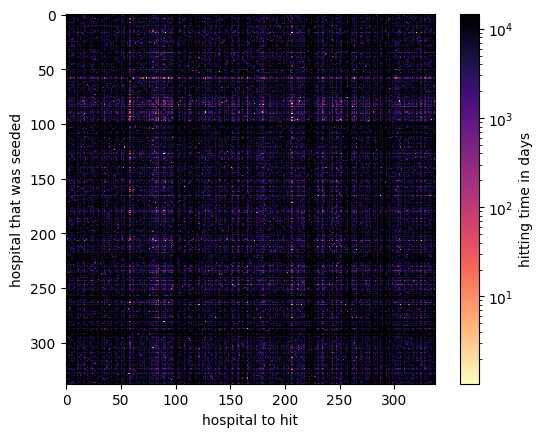

In [9]:
f, ax = plt.subplots()
YY = np.zeros_like(hit_mean)
np.fill_diagonal(YY, np.nan)
im = ax.imshow(hit_mean+YY, norm=colors.LogNorm(), cmap='magma_r', interpolation='nearest')
ax.set_facecolor('k')
f.colorbar(im, label='hitting time in days')
ax.set_xlabel('hospital to hit')
ax.set_ylabel('hospital that was seeded')


In [10]:
graph_adj = hit_mean+YY
graph_adj[np.isnan(graph_adj)] = 0.0

GG = nx.from_numpy_array(graph_adj, create_using=nx.DiGraph)
[len(c) for c in nx.weakly_connected_components(GG)]

[327, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [11]:
AA = np.clip(1/hit_mean, 0, 1)
AA[np.isnan(AA)] = 0.0
AA -= np.eye(AA.shape[0]) # eliminate diagonal (self loops)

/tmp/ipykernel_35023/403462788.py:1: RuntimeWarning: divide by zero encountered in divide
  AA = np.clip(1/hit_mean, 0, 1)


In [12]:
if RAW:
    with open("zero_ss_new_sims/my_metrics.pkl", 'rb') as fp:
        met_ss = pickle.load(fp)
    met_ss_df = summ.results_to_polars(met_ss)
else:
    met_ss_df = pl.read_csv("./zero_ss_new_sims/met_df.csv").with_columns(pl.selectors.starts_with('hitt').cast(pl.Float64))

In [122]:
ehome_summ = nsu.Summariser("./zero_ss_exact_home_sims/sim_all.h5")
met_eh = ehome_summ.collect(no_move=False)

In [124]:
met_df_eh = ehome_summ.results_to_polars(met_eh)

In [127]:
met_df_eh

seed,simdate,simtime,hitting_time_0,hitting_time_1,hitting_time_2,hitting_time_3,hitting_time_4,hitting_time_5,hitting_time_6,hitting_time_7,hitting_time_8,hitting_time_9,hitting_time_10,hitting_time_11,hitting_time_12,hitting_time_13,hitting_time_14,hitting_time_15,hitting_time_16,hitting_time_17,hitting_time_18,hitting_time_19,hitting_time_20,hitting_time_21,hitting_time_22,hitting_time_23,hitting_time_24,hitting_time_25,hitting_time_26,hitting_time_27,hitting_time_28,hitting_time_29,hitting_time_30,hitting_time_31,hitting_time_32,hitting_time_33,…,hitting_time_304,hitting_time_305,hitting_time_306,hitting_time_307,hitting_time_308,hitting_time_309,hitting_time_310,hitting_time_311,hitting_time_312,hitting_time_313,hitting_time_314,hitting_time_315,hitting_time_316,hitting_time_317,hitting_time_318,hitting_time_319,hitting_time_320,hitting_time_321,hitting_time_322,hitting_time_323,hitting_time_324,hitting_time_325,hitting_time_326,hitting_time_327,hitting_time_328,hitting_time_329,hitting_time_330,hitting_time_331,hitting_time_332,hitting_time_333,hitting_time_334,hitting_time_335,hitting_time_336,hitting_time_337,ssi_mean,ssi_std,emptying_time
i64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0,"""240724""","""154529""",0.0,null,2750.0,null,null,null,null,null,null,null,null,null,null,null,null,null,2614.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,2368.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1712.0,2501.0,null,null,null,null,null,null,null,null,null,null,null,null,null,0.223417,0.195322,25.0
1,"""240724""","""154533""",null,0.0,null,null,null,null,null,null,null,null,2253.0,null,null,null,null,167.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,81.0,1953.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,2244.0,null,null,null,null,null,null,null,null,1575.0,null,null,null,null,0.197193,0.184968,8.0
2,"""240724""","""154534""",null,null,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1174.0,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,622.0,null,null,null,null,null,null,2917.0,null,2697.0,null,null,null,null,null,null,null,null,null,null,null,null,null,803.0,434.0,null,null,null,null,0.196097,0.190061,7.0
3,"""240724""","""154536""",null,null,null,0.0,null,null,null,null,null,null,2039.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,0.112119,0.141287,8.0
4,"""240724""","""154538""",null,null,null,null,0.0,null,null,303.0,null,null,2142.0,null,null,null,null,null,2096.0,null,null,null,null,null,466.0,1851.0,null,2502.0,null,2486.0,null,2876.0,null,null,null,null,…,689.0,279.0,null,null,null,848.0,null,null,704.0,121.0,null,null,704.0,null,684.0,null,2041.0,396.0,null,2444.0,1180.0,351.0,null,779.0,119.0,null,null,1957.0,2251.0,956.0,null,1508.0,null,2421.0,0.228215,0.11356,1303.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
333,"""240724""","""184858""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,825.0,null,null,null,null,null,null,null,2809.0,null,null,null,null,null,2677.0,null,null,null,null,657.0,1923.0,null,null,972.0,null,null,null,null,1488.0,

In [13]:
hit_mean_ss = met_ss_df.group_by('seed').agg(
    pl.selectors.starts_with('hitt').mean()
).sort('seed').drop('seed').to_numpy().astype('float')

In [14]:
BB = np.clip(1/hit_mean_ss, 0, 1)
BB[np.isnan(BB)] = 0.0
BB -= np.eye(BB.shape[0]) # eliminate diagonal (self loops)

/tmp/ipykernel_35023/470442098.py:1: RuntimeWarning: divide by zero encountered in divide
  BB = np.clip(1/hit_mean_ss, 0, 1)


In [15]:
np.linalg.norm(BB - AA, ord=1)

4.453640398294132

In [16]:
met_ss_df.filter(pl.col('seed') == 0)

seed,simdate,simtime,hitting_time_0,hitting_time_1,hitting_time_2,hitting_time_3,hitting_time_4,hitting_time_5,hitting_time_6,hitting_time_7,hitting_time_8,hitting_time_9,hitting_time_10,hitting_time_11,hitting_time_12,hitting_time_13,hitting_time_14,hitting_time_15,hitting_time_16,hitting_time_17,hitting_time_18,hitting_time_19,hitting_time_20,hitting_time_21,hitting_time_22,hitting_time_23,hitting_time_24,hitting_time_25,hitting_time_26,hitting_time_27,hitting_time_28,hitting_time_29,hitting_time_30,hitting_time_31,hitting_time_32,hitting_time_33,…,hitting_time_304,hitting_time_305,hitting_time_306,hitting_time_307,hitting_time_308,hitting_time_309,hitting_time_310,hitting_time_311,hitting_time_312,hitting_time_313,hitting_time_314,hitting_time_315,hitting_time_316,hitting_time_317,hitting_time_318,hitting_time_319,hitting_time_320,hitting_time_321,hitting_time_322,hitting_time_323,hitting_time_324,hitting_time_325,hitting_time_326,hitting_time_327,hitting_time_328,hitting_time_329,hitting_time_330,hitting_time_331,hitting_time_332,hitting_time_333,hitting_time_334,hitting_time_335,hitting_time_336,hitting_time_337,ssi_mean,ssi_std,emptying_time
i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0,240613,72605,0.0,null,1333.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1447.0,null,null,null,null,null,null,null,null,null,null,…,969.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,455.0,null,null,null,null,0.211298,0.244282,41.0
0,240613,63834,0.0,null,null,null,null,null,null,null,null,null,731.0,null,null,null,null,null,null,null,null,null,null,null,null,1194.0,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,2202.0,null,null,null,null,null,null,null,null,null,null,null,null,null,339.0,2512.0,null,null,null,202.0,null,null,null,null,null,null,null,null,null,0.219719,0.253253,2.0
0,240613,55939,0.0,2722.0,null,null,null,null,2468.0,null,null,null,null,null,null,null,null,null,2425.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,568.0,null,null,null,null,null,null,2375.0,null,null,null,null,1853.0,null,2372.0,null,null,null,null,null,null,null,null,1226.0,482.0,null,null,null,null,0.226909,0.254292,11.0
0,240613,75744,0.0,1656.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1019.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,42.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1700.0,null,null,null,null,452.0,null,null,null,null,138.0,null,null,null,null,0.229031,0.256232,11.0
0,240613,70158,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1002.0,null,null,null,null,null,null,null,null,2024.0,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,2621.0,705.0,null,null,null,null,null,null,null,null,1593.0,null,2078.0,null,null,0.225745,0.248944,11.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,240613,71002,0.0,null,552.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1446.0,null,null,null,null,null,…,null,2888.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,2266.0,null,null,null,null,null,null,null,null,null,0.222253,0.254204,6.0
0,240613,73355,0.0,null,null,null,null,null,null,null,nul

In [17]:
met_ss_df_nn = met_ss_df.with_columns(non_nulls=met_ss_df.select(pl.selectors.starts_with('hitt').is_not_null().cast(pl.Int32)).sum_horizontal())

In [18]:
TDF = 0.2
met_df.filter(pl.col('seed') == 0).with_columns(pl.selectors.starts_with('hitt') * TDF)

seed,simdate,simtime,hitting_time_0,hitting_time_1,hitting_time_2,hitting_time_3,hitting_time_4,hitting_time_5,hitting_time_6,hitting_time_7,hitting_time_8,hitting_time_9,hitting_time_10,hitting_time_11,hitting_time_12,hitting_time_13,hitting_time_14,hitting_time_15,hitting_time_16,hitting_time_17,hitting_time_18,hitting_time_19,hitting_time_20,hitting_time_21,hitting_time_22,hitting_time_23,hitting_time_24,hitting_time_25,hitting_time_26,hitting_time_27,hitting_time_28,hitting_time_29,hitting_time_30,hitting_time_31,hitting_time_32,hitting_time_33,…,hitting_time_304,hitting_time_305,hitting_time_306,hitting_time_307,hitting_time_308,hitting_time_309,hitting_time_310,hitting_time_311,hitting_time_312,hitting_time_313,hitting_time_314,hitting_time_315,hitting_time_316,hitting_time_317,hitting_time_318,hitting_time_319,hitting_time_320,hitting_time_321,hitting_time_322,hitting_time_323,hitting_time_324,hitting_time_325,hitting_time_326,hitting_time_327,hitting_time_328,hitting_time_329,hitting_time_330,hitting_time_331,hitting_time_332,hitting_time_333,hitting_time_334,hitting_time_335,hitting_time_336,hitting_time_337,ssi_mean,ssi_std,emptying_time
i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0,240408,203608,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1618.8,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,2166.4,null,null,null,2613.6,null,null,2338.4,null,null,null,null,null,null,null,null,null,null,552.0,null,null,null,null,1151.8,null,null,null,null,38.6,null,null,null,null,0.058037,0.105197,44.0
0,240408,195209,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,2443.8,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,584.2,null,null,null,1602.6,null,null,null,null,null,null,null,null,null,1031.6,671.2,null,null,null,803.6,null,null,null,null,700.4,null,null,null,null,0.073885,0.120307,143.0
0,240408,220426,0.0,null,477.2,null,1116.8,null,null,null,null,null,null,null,null,null,null,null,2697.4,null,null,null,null,null,1322.0,null,null,null,null,null,null,null,null,null,null,null,…,223.0,1943.8,null,null,null,1837.2,null,null,1892.6,null,null,null,null,null,null,null,null,null,null,2494.6,null,null,null,null,null,null,null,null,null,342.0,null,null,null,null,0.051065,0.102408,34.0
0,240408,192952,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,1317.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1277.2,null,null,null,null,null,null,null,null,null,0.054421,0.108156,43.0
0,240408,224829,0.0,null,null,null,2063.6,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,2581.6,null,null,null,null,…,2819.0,1981.2,null,null,null,null,null,null,null,null,null,null,null,null,null,null,2331.0,null,null,630.4,null,null,null,null,null,null,null,null,null,2044.2,null,null,null,null,0.05964,0.111101,131.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,240408,231035,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1752.4,2298.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,537.4,null,null,null,null,null,null,null,null,2658.2,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1231.4,null,null,null,null,0.048997,0.101096,80.0
0,240409,162136,0.0,null,99.0,null,null,n

In [19]:
met_df_nn = met_df.with_columns(non_nulls=met_df.select(pl.selectors.starts_with('hitt').is_not_null().cast(pl.Int32)).sum_horizontal())

In [20]:
mdn, mdsn = met_df_nn.select('seed', 'non_nulls'), met_ss_df_nn.select('seed', 'non_nulls')

:Scatter   [seed]   (non_nulls)
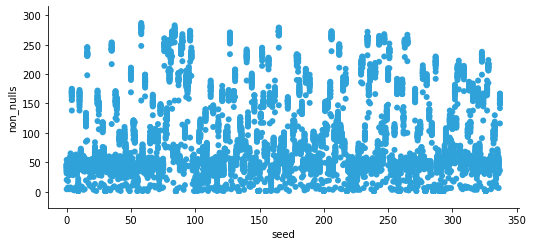

In [21]:
mdn.plot.scatter(x='seed', y='non_nulls')

:Scatter   [seed]   (non_nulls)
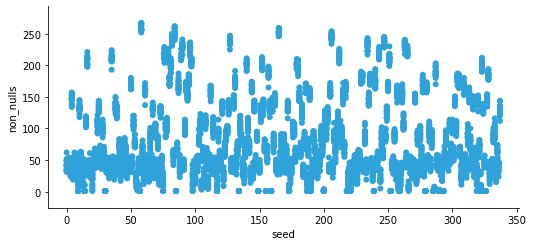

In [22]:
mdsn.plot.scatter(x='seed', y='non_nulls')

In [23]:
sampel_realisation = np.load("zero_sims/sim_101_240409_002302.npz")

In [24]:
move_out = np.squeeze(sampel_realisation['mover_out'])
move_out_t, move_out_x = np.where(move_out)

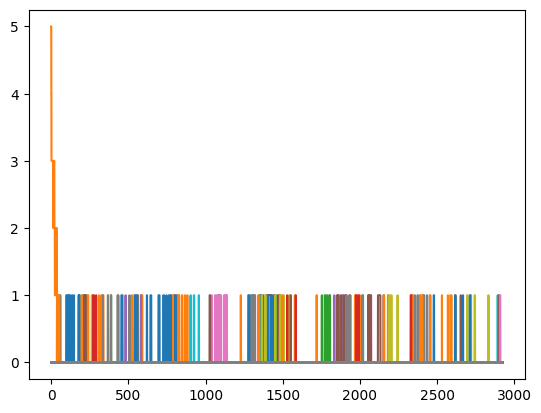

In [25]:
plt.figure()
plt.plot(sampel_realisation['t'], sampel_realisation['history'].T);

In [26]:
place_order = np.asanyarray(sorted(zip(*np.unique(np.where(move_out)[1], return_index=True)), key=lambda x:x[1]))[:,0]
place_order_map = np.vectorize({x:i for i,x in enumerate(place_order)}.get)
place_order_map(move_out_x)


array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        2,  0,  1,  2,  1,  3,  4,  1,  3,  2,  5,  5,  3,  3,  6,  3,  6,
        6,  7,  6,  8,  9, 10,  6,  3,  9,  3,  9,  3, 10,  3,  3,  1,  1,
        9,  1,  1,  1,  9, 11,  3, 11,  9, 11,  3,  3,  3,  3, 12, 12, 12,
       13, 14, 14, 14, 14, 15, 11, 14, 14, 14, 14, 16,  3,  1, 17,  1,  7,
       17, 14, 18,  2, 19, 20, 19,  2,  2, 21, 20, 11,  2,  2, 20, 21, 20,
       21,  7, 22,  7, 21, 20,  7, 22, 23, 22, 24, 25, 11,  3, 24,  3,  7,
        7, 26,  7, 27, 27,  4, 28, 27,  4, 27,  4, 27,  4, 29, 29, 24, 30,
       24, 30, 24, 30, 31, 32, 33, 33, 34, 28, 28, 30, 30, 31, 19, 19, 19,
       24, 35, 31, 30, 30, 31, 31, 31, 30, 30, 34, 31, 31, 31, 30,  9, 36,
       30,  2, 30, 30, 37, 38,  4,  9,  2,  1,  2,  2,  2, 32,  4, 14])

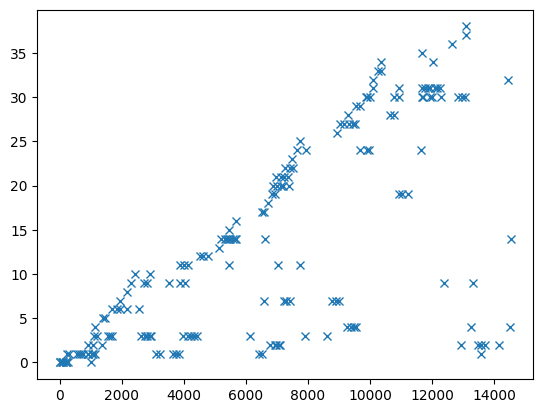

In [27]:
plt.figure()
plt.plot(move_out_t, place_order_map(move_out_x), 'x')

In [28]:
sorted(zip(*np.unique(move_out_x, return_counts=True)), key=lambda x:x[1], reverse=True)

[(80, 19),
 (131, 18),
 (58, 13),
 (251, 13),
 (101, 10),
 (206, 10),
 (127, 9),
 (82, 8),
 (320, 8),
 (165, 7),
 (125, 6),
 (263, 6),
 (4, 5),
 (140, 5),
 (167, 5),
 (328, 5),
 (93, 4),
 (69, 3),
 (95, 3),
 (178, 3),
 (16, 2),
 (73, 2),
 (89, 2),
 (234, 2),
 (247, 2),
 (265, 2),
 (287, 2),
 (11, 1),
 (28, 1),
 (32, 1),
 (61, 1),
 (86, 1),
 (141, 1),
 (151, 1),
 (235, 1),
 (258, 1),
 (260, 1),
 (271, 1),
 (282, 1)]

In [29]:
ords = ntc.Ordering.from_file("concordant_networks/size_14.csv")

In [30]:
ords.sizes[[80, 131, 58, 251, 101, 206]]

array([ 90,  89, 531, 199,   5, 440])

In [146]:
np.argsort(met_df.filter(pl.col('seed') == 0).select(pl.selectors.starts_with('hitting_time_').null_count()).transpose().to_series().to_numpy()*
    met_df_eh.filter(pl.col('seed') == 0).select(pl.selectors.starts_with('hitting_time_').null_count()).transpose().to_series().to_numpy(),
    )

array([  0, 236,  96, 202,  58, 333, 206,  82,  84, 251, 250,  59, 234,
       180, 211, 127,  35,  79, 165,  77,  89, 323, 135, 304, 247,  90,
        16,  61, 144,  76, 263, 287, 249, 212, 157, 324, 265, 328, 243,
       179, 217, 152, 213, 261, 171,  73,  93, 235, 230, 303, 302, 257,
       277, 231, 130, 186, 172,  97,   2, 292, 158, 309, 146, 305,  50,
        87, 280, 301,  15, 320,  94, 214, 205, 295, 275,  80,  81, 262,
        29, 240, 232, 108, 273, 140,   4, 209, 203, 327,  69, 271,  78,
       229, 112, 167,  34, 169, 121,  92, 313, 153,  49, 136,  53,  67,
       221, 215, 312, 198, 256, 123,  65, 255, 321, 176,  23,  46, 220,
       189, 132, 201, 185, 177, 316,  25,  39, 332, 150, 294, 245, 174,
       272, 276, 160, 210, 284, 148, 154, 168,  99,  38, 106,  70, 103,
        13,  86, 131,  24, 102,   1, 111, 101, 104, 248, 298, 107, 181,
       183, 141,  95, 241, 331,  52,  56, 216,  66,  88,  68, 227, 253,
        71,  72, 219,  74, 238,  63, 138,  47, 335,  10, 318, 31

In [158]:
A = met_df.filter(pl.col('seed') == 0).select(pl.col('hitting_time_2') * TDF).to_series().to_numpy()
B = met_df_eh.filter(pl.col('seed') == 0).select(pl.col('hitting_time_2')).to_series().to_numpy()
[(sum(np.isfinite(x)), x) for x in (A, B)]

[(5,
  array([  nan,   nan, 477.2,   nan,   nan,   nan, 779.4,   nan,   nan,
           nan,   nan, 106. ,   nan,   nan,   nan,   nan,  99. ,   nan,
           nan, 205.2])),
 (4,
  array([2750.,   nan,   nan,   nan,   nan,   nan,   nan,  369.,   nan,
          378.,   nan,   nan,  943.,   nan,   nan,   nan,   nan,   nan,
           nan,   nan]))]

In [162]:
stats.ks_2samp(A, B)

KstestResult(statistic=0.15, pvalue=0.9831368772656193, statistic_location=205.20000000000002, statistic_sign=1)

In [171]:
stats._stats_py._attempt_exact_2kssamp(20, 20, 20, 0.15, 'two-sided')

(True, 0.15, 0.9831368772656193)

In [173]:
stats._stats_py._attempt_exact_2kssamp(5, 5, 5, 0.6, 'two-sided')

(True, 0.6, 0.35714285714285715)

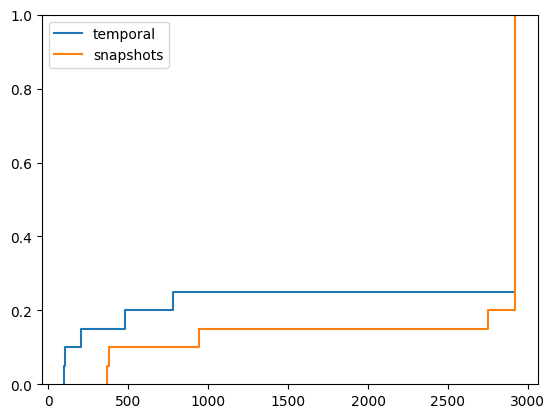

In [164]:
plt.figure()
plt.ecdf([*A[np.isfinite(A)], *(np.ones_like(A[np.isnan(A)]) * 8*365+1)])
plt.ecdf([*B[np.isfinite(B)], *(np.ones_like(B[np.isnan(B)]) * 8*365+1)])
plt.legend(['temporal', 'snapshots'])

In [160]:
stats.ks_2samp([*A[np.isfinite(A)], *(np.ones_like(A[np.isnan(A)]) * 8*365+1)], 
               [*B[np.isfinite(B)], *(np.ones_like(B[np.isnan(B)]) * 8*365+1)])

KstestResult(statistic=0.15, pvalue=0.9831368772656193, statistic_location=205.20000000000002, statistic_sign=1)

In [161]:
stats.anderson_ksamp([
    [*A[np.isfinite(A)], *(np.ones_like(A[np.isnan(A)]) * 8*365+1)], 
    [*B[np.isfinite(B)], *(np.ones_like(B[np.isnan(B)]) * 8*365+1)]
])

/tmp/ipykernel_35023/1095431178.py:1: UserWarning: p-value capped: true value larger than 0.25
  stats.anderson_ksamp([


Anderson_ksampResult(statistic=-0.8323792794539552, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), pvalue=0.25)

In [185]:
RAW_TESTS = True

if RAW_TESTS:
    test_results_ks_eh = dict()
    for target_seed in range(338):
        for cname in met_df.select(pl.selectors.starts_with('hitting_time')).columns:
            cidx = int(cname.split('_')[-1])
            test_idx = (target_seed, cidx)
            if cidx == target_seed:
                continue
            temporal_col = met_df.filter(pl.col('seed') == target_seed).select(pl.col(cname) * TDF).to_series().to_numpy()
            snapshot_col = met_df_eh.filter(pl.col('seed') == target_seed).select(pl.col(cname)).to_series().to_numpy()
    #         if (sum(np.isfinite(temporal_col)) + sum(np.isfinite(snapshot_col))) < 1:
    #             test_results[test_idx] = stats._morestats.Anderson_ksampResult(np.nan, np.array([]), 1.0)
    #         else:
    #             test_results[test_idx] = stats.anderson_ksamp([temporal_col, snapshot_col])
            test_results_ks_eh[test_idx] = stats.ks_2samp(temporal_col, snapshot_col)
else:
    with open("zero_comparison_results_ks.npkl", 'rb') as ifp:
        test_results_ks = pickle.load(ifp)

In [186]:
WRITE_TESTS = True
if WRITE_TESTS:
    with open("zero_comparison_results_ks_eh.npkl", 'wb') as ofp:
        pickle.dump(test_results_ks_eh, ifp)

UnsupportedOperation: write

In [41]:
AA = met_df.filter(pl.col('seed') == 0).select(pl.col('hitting_time_2') * TDF).to_series().to_numpy()

In [42]:
AA2 = np.array(AA)
AA2[np.isnan(AA2)] = 8*365+1

In [43]:
BB = met_ss_df.filter(pl.col('seed') == 0).select(pl.col('hitting_time_2')).to_series().to_numpy()

In [44]:
BB2 = np.array(BB)
BB2[np.isnan(BB2)] = 8*365+1

In [45]:
stats.anderson_ksamp([BB, AA])

/tmp/ipykernel_35023/3017349457.py:1: UserWarning: p-value capped: true value larger than 0.25
  stats.anderson_ksamp([BB, AA])


Anderson_ksampResult(statistic=-1.105807225229972, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), pvalue=0.25)

In [46]:
stats.anderson_ksamp([BB2, AA2])

/tmp/ipykernel_35023/1248389040.py:1: UserWarning: p-value capped: true value larger than 0.25
  stats.anderson_ksamp([BB2, AA2])


Anderson_ksampResult(statistic=-1.105807225229972, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), pvalue=0.25)

In [48]:
Z = np.sort(np.hstack([AA, BB]))
Zstar = np.unique(Z)
k = 2
n = np.array([AA.size, BB.size])
N = Z.size

In [49]:
A2kN = stats._morestats._anderson_ksamp_midrank([AA, BB], Z, Zstar, k, n, N)

In [50]:
met_df.shape

(6760, 344)

Text(0, 0.5, 'Frequency')

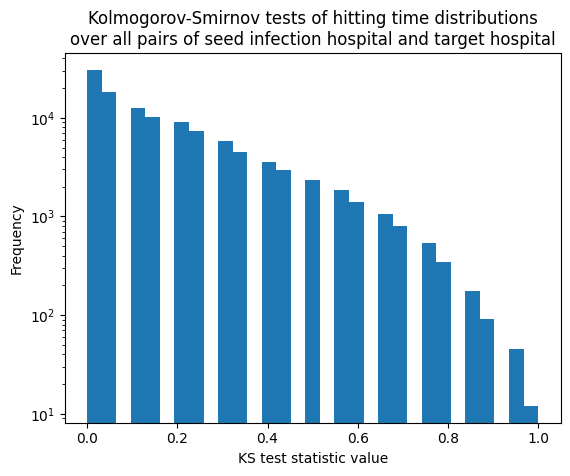

In [51]:
plt.title('Kolmogorov-Smirnov tests of hitting time distributions\nover all pairs of seed infection hospital and target hospital')
plt.hist([x.statistic for x in test_results_ks.values()], bins=31)
# plt.axvline(0, color='k')
plt.xlabel('KS test statistic value')
plt.yscale('log')
plt.ylabel('Frequency')
# plt.savefig('ks_tests_all_pairs.png', dpi=200)

Text(0, 0.5, 'Frequency')

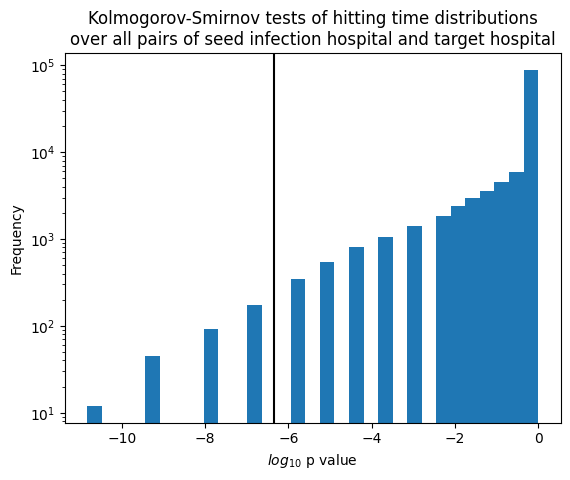

In [52]:
plt.title('Kolmogorov-Smirnov tests of hitting time distributions\nover all pairs of seed infection hospital and target hospital')
plt.hist([np.log10(x.pvalue) for x in test_results_ks.values()], bins=31)
plt.axvline(np.log10(0.05 / 338**2), color='k')
plt.xlabel('$log_{10}$ p value')
plt.yscale('log')
plt.ylabel('Frequency')
# plt.savefig('ks_pvalues_all_pairs.png', dpi=200)

In [54]:
capped_out = [x 
              for x,y in test_results_ks.items() 
              if 1e-4 < y.pvalue < 1e-3]

In [55]:
capped_out = np.asanyarray(capped_out)
capped_out.shape

(1057, 2)

In [56]:
iii = np.random.choice(np.arange(capped_out.shape[0]))
chosen = capped_out[iii]
chosen

array([157,   3])

In [57]:
CC = met_df.filter(pl.col('seed') == chosen[0]).select(pl.col(f"hitting_time_{chosen[1]}") * TDF).to_series().to_numpy()
DD = met_ss_df.filter(pl.col('seed') == chosen[0]).select(pl.col(f"hitting_time_{chosen[1]}")).to_series().to_numpy()

In [58]:
def finitize(arr, subs):
    return np.asanyarray([
        *arr[np.isfinite(arr)],
        *(np.ones_like(CC[np.isnan(CC)]) * subs),
    ])

In [59]:
CC_f = finitize(CC, 8*365+1)
DD_f = finitize(DD, 8*365+1)

In [60]:
k2CD = stats.ks_2samp(CC, DD)

CC_ecdf = stats.ecdf(CC_f)
DD_ecdf = stats.ecdf(DD_f)

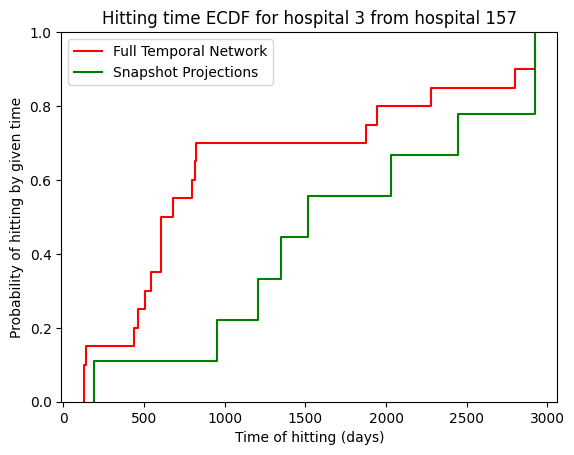

In [70]:

plt.figure()
ecdf_c = plt.ecdf(
    CC_f,
    color='red',
    label='Full Temporal Network',
)
ecdf_d = plt.ecdf(
    DD_f, 
    color='green',
    label='Snapshot Projections',
)

plt.title(f"Hitting time ECDF for hospital {chosen[1]} from hospital {chosen[0]}")
plt.ylabel('Probability of hitting by given time')
plt.xlabel('Time of hitting (days)')
plt.legend()

# xmax = k2CD.statistic_location
# plt.arrow(xmax, CC_ecdf.cdf.evaluate(xmax),
#           0, DD_ecdf.cdf.evaluate(xmax) - CC_ecdf.cdf.evaluate(xmax),
#           color = 'k',
#          )
# plt.arrow(xmax, DD_ecdf.cdf.evaluate(xmax),
#           0, CC_ecdf.cdf.evaluate(xmax) - DD_ecdf.cdf.evaluate(xmax),
#           color='k',
#          )

# plt.xlim(xmax+90, xmax+110)
# plt.savefig('zero_example_hit_ecdf_ks.png', dpi=200)

In [71]:
chosen, ords.sizes[chosen]

(array([157,   3]), array([139,   6]))

In [76]:
normalised_met_df = met_df.with_columns(
    pl.selectors.starts_with('hitting_time_') * TDF)

In [80]:
def test_look(testkey, df1=normalised_met_df, df2=met_ss_df, tspan=(8*365+1), label1="Full Temporal Network", label2="Snapshot Projection"):
    dat1 = df1.filter(pl.col('seed') == testkey[0]).select(pl.col(f"hitting_time_{testkey[1]}")).to_series().to_numpy()
    dat2 = df2.filter(pl.col('seed') == testkey[0]).select(pl.col(f"hitting_time_{testkey[1]}")).to_series().to_numpy()
    fdat1 = finitize(dat1, tspan)
    fdat2 = finitize(dat2, tspan)

    
    f = plt.figure()
    ecdf_c = plt.ecdf(
        fdat1,
        color='C0',
        label=label1,
    )
    ecdf_d = plt.ecdf(
        fdat2, 
        color='C1',
        label=label2,
    )
    
    plt.title(f"Hitting time ECDF for hospital {testkey[1]} from hospital {testkey[0]}")
    plt.ylabel('Probability of hitting by given time')
    plt.xlabel('Time of hitting (days)')
    plt.legend()

    return f

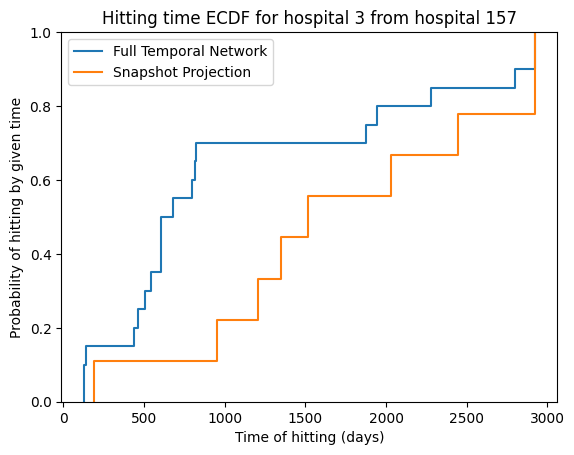

In [181]:
_ = test_look((157, 3))

In [180]:
test_results_ks[(157, 3)].statistic_sign

1

{'whiskers': [<matplotlib.lines.Line2D at 0x7ad2ddcdc6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ad2ddcdcbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ad2ddcdc400>,
 'medians': [<matplotlib.lines.Line2D at 0x7ad2ddcdd120>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ad2ddcdd3c0>,
 'means': []}

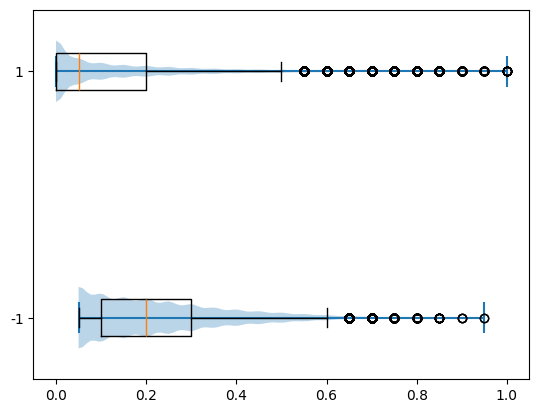

In [98]:
test_values = np.array([v.statistic for v in test_results_ks.values()])
test_sign = np.array([v.statistic_sign for v in test_results_ks.values()])

plt.violinplot([test_values[test_sign==v] for v in (-1, 1)], positions=[-1, 1], vert=False)
plt.boxplot([test_values[test_sign==v] for v in (-1, 1)], positions=[-1, 1], vert=False)

In [113]:
test_values_inverted = np.log10(1+1/40-test_values)

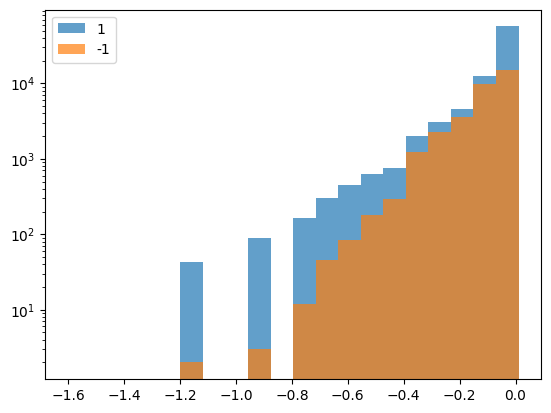

In [184]:
hps = dict()
for label in (1, -1):
    dat = test_values_inverted[test_sign==label]
    hps[label] = plt.hist(dat, label=str(label), bins=np.linspace(np.log10(1/40),np.log10(1+1/40),21), alpha=0.7, log=True)
    # if label==-1:
    #     maxh = 0
    #     for patch in hps:
    #         h = patch.get_height()
    #         maxh = max(maxh, h)
    #         patch.set_height(-h)
# plt.ylim([-1.1*maxh, None])
plt.legend()
# plt.yscale('symlog', linthresh=1e1)

In [120]:
hps[-1][0] / hps[1][0]

/tmp/ipykernel_35023/1415997990.py:1: RuntimeWarning: invalid value encountered in divide
  hps[-1][0] / hps[1][0]


array([       nan,        nan,        nan,        nan,        nan,
       0.04651163,        nan,        nan, 0.03409091,        nan,
       0.07407407, 0.15333333, 0.18241758, 0.288     , 0.37989556,
       0.61845387, 0.75115207, 0.80017683, 0.77516111, 0.26770931])

In [121]:
sum(hps[-1][0]) / (sum(hps[-1][0]) + sum(hps[1][0]))

0.2868281033241435